In [1]:
!nvidia-smi

Tue Aug  2 18:08:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# BEFORE MIDTERM CODE

In [1]:
!pip install torchdata
!pip install -U torchtext==0.13.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 16.4 MB/s 
     |████████████████████████████████| 139 kB 71.1 MB/s 
     |████████████████████████████████| 127 kB 72.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
import torchtext
from torchtext.datasets import IMDB

In [4]:
train_iter = iter(IMDB(split='train'))
test_iter = iter(IMDB(split='test'))

In [5]:
example1 = next(train_iter)
example2 = next(test_iter)
print(example1)
print(example2)

('neg', 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far bet

In [ ]:
train_list = list(IMDB(split='train'))
test_list = list(IMDB(split='test'))

min_length = 200
for example in train_list:
  if len(example[1]) < min_length:
    print(example)
    min_example = example
    min_length = len(example[1])
print(min_example)

In [ ]:
print(len(list(train_iter)))
print(len(list(test_iter)))

25000
25000


In [ ]:
train_data = list(IMDB(split='train'))
#train_data = [(0, t[1]) if t[0]=='neg' else (1, t[1]) for t in train_data]
test_data = list(IMDB(split='test'))
#test_data = [(0, t[1]) if t[0]=='neg' else (1, t[1]) for t in test_data]

In [ ]:
train_labels = [i[0] for i in train_data]
test_labels = [i[0] for i in test_data]
train_unique_labels = list(set(train_labels))
test_unique_labels = list(set(test_labels))
train_label_counts = [train_labels.count(i) for i in train_unique_labels]
test_label_counts = [test_labels.count(i) for i in test_unique_labels]


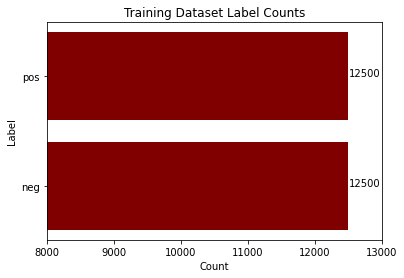

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Count')
plt.ylabel('Label')
plt.title('Training Dataset Label Counts')
plt.barh(train_unique_labels, train_label_counts, color = 'maroon')
for index, value in enumerate(train_label_counts):
    plt.text(value, index,
             str(value))
plt.xlim([8000, 13000])
plt.show()

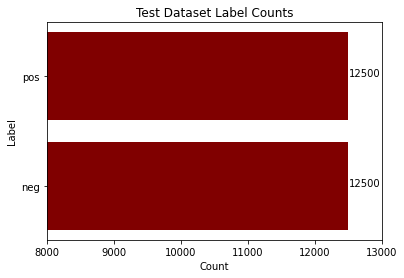

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Count')
plt.ylabel('Label')
plt.title('Test Dataset Label Counts')
plt.barh(test_unique_labels, test_label_counts, color = 'maroon')
for index, value in enumerate(train_label_counts):
    plt.text(value, index,
             str(value))
plt.xlim([8000, 13000])
plt.show()

In [ ]:
for i in range(5):
  print(test_data[i])

(1, "Previous reviewer Claudio Carvalho gave a much better recap of the film's plot details than I could. What I recall mostly is that it was just so beautiful, in every sense - emotionally, visually, editorially - just gorgeous.<br /><br />If you like movies that are wonderful to look at, and also have emotional content to which that beauty is relevant, I think you will be glad to have seen this extraordinary and unusual work of art.<br /><br />On a scale of 1 to 10, I'd give it about an 8.75. The only reason I shy away from 9 is that it is a mood piece. If you are in the mood for a really artistic, very romantic film, then it's a 10. I definitely think it's a must-see, but none of us can be in that mood all the time, so, overall, 8.75.")
(1, 'CONTAINS "SPOILER" INFORMATION. Watch this director\'s other film, "Earth", at some point. It\'s a better film, but this one isn\'t bad just different.<br /><br />A rare feminist point of view from an Indian filmmaker. Tradition, rituals, duty, 

In [ ]:
# get a count of the positive and negative reviews in the dataset
labels = set([t[0] for t in train_data])

print(labels)

{0, 1}


In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import Vocab, build_vocab_from_iterator

tokenizer = get_tokenizer('basic_english')
train_iter = IMDB(split='train')
test_iter = IMDB(split='test')

def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer(text)

# Build a vocabulary from the training set including only those
# words that occur at least a 1000 times.
vocab = build_vocab_from_iterator(yield_tokens(train_iter), 
                                  specials=["<unk>"], min_freq=1000)
# Set the default word
vocab.set_default_index(vocab["<unk>"])

In [ ]:
vocab_size = len(vocab)
print(vocab_size)

603


In [ ]:
from torch.utils.data import DataLoader
import numpy as np

def collate_into_bow(batch):
    vocab_itos = vocab.get_itos()
    
    ## Task 5
    k = len(batch) # the batch has k examples
    m = len(vocab) # m is the number of tokens in the vocab
    
    bow_vectors = torch.zeros(size=(k, m))
    # num is the example number and ex is the actual example
    for num, ex in enumerate(batch):
        ex_tokens = tokenizer(ex[1])
        ex_idxs = vocab.lookup_indices(ex_tokens)
        # idx is the index in vocab and tkn is the token in the example of concern
        for idx, tkn in zip(ex_idxs, ex_tokens):
            if tkn in vocab_itos:
                # only add to the count if the word is in the vocab
                bow_vectors[num, idx] += 1
    bow_vectors = bow_vectors / k
    bow_vectors = torch.tensor(bow_vectors, dtype=torch.float32)
    labels = torch.tensor([ex[0] for ex in batch])
    #print(labels)
    return labels, bow_vectors

In [ ]:
from torch import nn
import torch.nn.functional as F

class BoWClassifier(nn.Module):
## Task 6
# I referred to this tutorial for help: https://pytorch.org/tutorials/beginner/nlp/deep_learning_tutorial.html#sphx-glr-beginner-nlp-deep-learning-tutorial-py
    def __init__(self, num_labels, vocab_size):
        super(BoWClassifier, self).__init__()
        self.linear = nn.Linear(vocab_size, num_labels)
    def forward(self, bow_vec):
        # pass through linear layer and then softmax
        return F.log_softmax(self.linear(bow_vec), dim=1) # should this be log softmax? seems to be more accurate than softmax based on research
        #return F.softmax(self.linear(bow_vec), dim=1)

In [ ]:
num_labels = len(set([label for (label, text) in train_data]))
#print(num_labels)
vocab_size = len(vocab)
#print(vocab_size)
model = BoWClassifier(num_labels, vocab_size)

In [ ]:
import time

loss_function = torch.nn.NLLLoss()

def train_an_epoch(dataloader):
    model.train() # Sets the module in training mode.
    log_interval = 500

    for idx, (label, text) in enumerate(dataloader):
        model.zero_grad()
        log_probs = model(text)
        loss = loss_function(log_probs, label)
        loss.backward()
        optimizer.step()
        #print(f'At iteration {idx} the loss is {loss:.3f}.')
        if idx % log_interval == 0 and idx > 0:
            print(f'At iteration {idx} the loss is {loss:.3f}.')

In [ ]:
def get_accuracy(dataloader):
    model.eval() # puts model in evaluation mode
    with torch.no_grad():
    ## Task 7    
        total_accuracy = 0
        total_count = 0
        for idx, (label, text) in enumerate(dataloader):
            #print('idx')
            #print(idx)
            #print('label')
            #print(label)
            #print('text')
            #print(text)
            #print(label)
            pred_label = model(text)
            #print('pred_label')
            #print(pred_label)
            total_accuracy += (pred_label.argmax(1) == label).sum().item() # sum up the correct labels
            total_count += label.size(dim=0) # sum up all the labels in the example
    
    return total_accuracy / total_count

In [ ]:
from torch.utils.data.dataset import random_split

BATCH_SIZE = 64 # batch size for training
  
train_valid_data, test_data = IMDB()
#train_valid_data = list(train_valid_data)
#test_data = list(test_data)
train_valid_data = [(0, t[1]) if t[0]=='neg' else (1, t[1]) for t in train_valid_data]
test_data = [(0, t[1]) if t[0]=='neg' else (1, t[1]) for t in test_data]
num_train = int(len(train_valid_data) * 0.90)
num_valid = len(train_valid_data) - num_train
train_data, valid_data = random_split(
    train_valid_data, [num_train, num_valid])

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE,
                              shuffle=True, 
                              collate_fn=collate_into_bow)
valid_dataloader = DataLoader(valid_data, batch_size=BATCH_SIZE,
                              shuffle=False, 
                              collate_fn=collate_into_bow)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE,
                             shuffle=False, 
                             collate_fn=collate_into_bow)

In [ ]:
len(train_data)

22500

In [ ]:
len(valid_data)

2500

In [ ]:
len(test_data)

25000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



After epoch 1 the validation accuracy is 0.505.


After epoch 2 the validation accuracy is 0.739.


After epoch 3 the validation accuracy is 0.613.



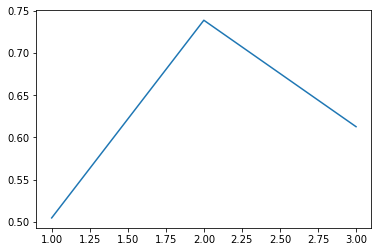

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

EPOCHS = 3
optimizer = torch.optim.SGD(model.parameters(), lr=3)

accuracies = []
for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train_an_epoch(train_dataloader)
    accuracy = get_accuracy(valid_dataloader)
    accuracies.append(accuracy)
    time_taken = time.time() - epoch_start_time
    print()
    print(f'After epoch {epoch} the validation accuracy is {accuracy:.3f}.')
    print()
    
plt.plot(range(1, EPOCHS+1), accuracies)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



After epoch 1 the validation accuracy is 0.515.


After epoch 2 the validation accuracy is 0.716.


After epoch 3 the validation accuracy is 0.709.


After epoch 4 the validation accuracy is 0.748.


After epoch 5 the validation accuracy is 0.751.

The optimal epoch is 5 with validation accuracy is 0.751.


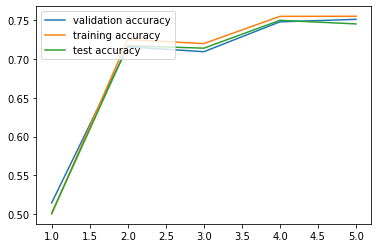

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

EPOCHS = 5
optimizer = torch.optim.SGD(model.parameters(), lr=3)

optimal_accuracy = 0
optimal_epoch = 0
accuracies = []
train_accuracies = []
test_accuracies = []
for epoch in range(1, EPOCHS + 1):
    #epoch_start_time = time.time()
    train_an_epoch(train_dataloader)
    train_accuracy = get_accuracy(train_dataloader)
    train_accuracies.append(train_accuracy)
    accuracy = get_accuracy(valid_dataloader)
    accuracies.append(accuracy)
    test_accuracy = get_accuracy(test_dataloader)
    test_accuracies.append(test_accuracy)
    #time_taken = time.time() - epoch_start_time
    print()
    print(f'After epoch {epoch} the validation accuracy is {accuracy:.3f}.')
    print()
    if accuracy > optimal_accuracy:
        optimal_accuracy = accuracy
        optimal_epoch = epoch

print(f'The optimal epoch is {optimal_epoch} with validation accuracy is {optimal_accuracy:.3f}.')
        
plt.plot(range(1, EPOCHS+1), accuracies, label = 'validation accuracy')
plt.plot(range(1, EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



After epoch 1 the validation accuracy is 0.554.


After epoch 2 the validation accuracy is 0.603.


After epoch 3 the validation accuracy is 0.628.


After epoch 4 the validation accuracy is 0.625.


After epoch 5 the validation accuracy is 0.646.


After epoch 6 the validation accuracy is 0.652.


After epoch 7 the validation accuracy is 0.653.


After epoch 8 the validation accuracy is 0.659.


After epoch 9 the validation accuracy is 0.658.


After epoch 10 the validation accuracy is 0.664.

The optimal epoch is 10 with validation accuracy is 0.664.


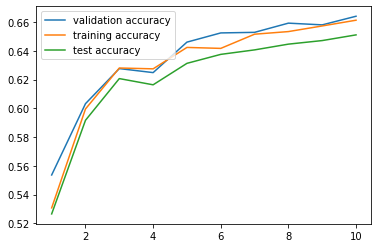

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

EPOCHS = 10
optimizer = torch.optim.SGD(model.parameters(), lr=.1)

optimal_accuracy = 0
optimal_epoch = 0
accuracies = []
train_accuracies = []
test_accuracies = []
for epoch in range(1, EPOCHS + 1):
    #epoch_start_time = time.time()
    train_an_epoch(train_dataloader)
    train_accuracy = get_accuracy(train_dataloader)
    train_accuracies.append(train_accuracy)
    accuracy = get_accuracy(valid_dataloader)
    accuracies.append(accuracy)
    test_accuracy = get_accuracy(test_dataloader)
    test_accuracies.append(test_accuracy)
    #time_taken = time.time() - epoch_start_time
    print()
    print(f'After epoch {epoch} the validation accuracy is {accuracy:.3f}.')
    print()
    if accuracy > optimal_accuracy:
        optimal_accuracy = accuracy
        optimal_epoch = epoch

print(f'The optimal epoch is {optimal_epoch} with validation accuracy is {optimal_accuracy:.3f}.')
        
plt.plot(range(1, EPOCHS+1), accuracies, label = 'validation accuracy')
plt.plot(range(1, EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



After epoch 1 the validation accuracy is 0.564.


After epoch 2 the validation accuracy is 0.659.


After epoch 3 the validation accuracy is 0.690.


After epoch 4 the validation accuracy is 0.694.


After epoch 5 the validation accuracy is 0.704.


After epoch 6 the validation accuracy is 0.709.


After epoch 7 the validation accuracy is 0.725.


After epoch 8 the validation accuracy is 0.722.


After epoch 9 the validation accuracy is 0.711.


After epoch 10 the validation accuracy is 0.744.


After epoch 11 the validation accuracy is 0.731.


After epoch 12 the validation accuracy is 0.736.


After epoch 13 the validation accuracy is 0.754.


After epoch 14 the validation accuracy is 0.756.


After epoch 15 the validation accuracy is 0.748.


After epoch 16 the validation accuracy is 0.764.


After epoch 17 the validation accuracy is 0.767.


After epoch 18 the validation accuracy is 0.767.


After epoch 19 the validation accuracy is 0.751.


After epoch 20 the validation accuracy 

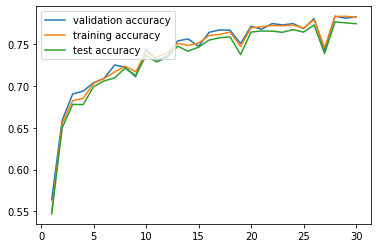

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

EPOCHS = 30
optimizer = torch.optim.SGD(model.parameters(), lr=.75)

optimal_accuracy = 0
optimal_epoch = 0
accuracies = []
train_accuracies = []
test_accuracies = []
for epoch in range(1, EPOCHS + 1):
    #epoch_start_time = time.time()
    train_an_epoch(train_dataloader)
    train_accuracy = get_accuracy(train_dataloader)
    train_accuracies.append(train_accuracy)
    accuracy = get_accuracy(valid_dataloader)
    accuracies.append(accuracy)
    test_accuracy = get_accuracy(test_dataloader)
    test_accuracies.append(test_accuracy)
    #time_taken = time.time() - epoch_start_time
    print()
    print(f'After epoch {epoch} the validation accuracy is {accuracy:.3f}.')
    print()
    if accuracy > optimal_accuracy:
        optimal_accuracy = accuracy
        optimal_epoch = epoch

print(f'The optimal epoch is {optimal_epoch} with validation accuracy is {optimal_accuracy:.3f}.')
        
plt.plot(range(1, EPOCHS+1), accuracies, label = 'validation accuracy')
plt.plot(range(1, EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")
print('last training accuracy:')
print(train_accuracies[-1])
print('last validation accuracy:')
print(accuracies[-1])
print('last test accuracy:')
print(test_accuracies[-1])

In [ ]:
import matplotlib.pyplot as plt
EPOCHS = 30
plt.plot(range(1, EPOCHS+1), accuracies, label = 'validation accuracy', color = 'grey')
plt.plot(range(1, EPOCHS+1), train_accuracies, label = 'training accuracy', color = 'black')
plt.plot(range(1, EPOCHS+1), test_accuracies, label = 'test accuracy', color = 'maroon')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")

In [ ]:
# AFTER MIDTERM CODE

In [1]:
!pip install torch==1.11 torchdata torchtext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 750.6 MB 12 kB/s 
     |████████████████████████████████| 4.4 MB 57.4 MB/s 
     |████████████████████████████████| 47 kB 5.4 MB/s 
     |████████████████████████████████| 139 kB 62.1 MB/s 
     |████████████████████████████████| 10.4 MB 27.1 MB/s 
     |████████████████████████████████| 127 kB 71.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0+cu113
    Uninstalling torch-1.12.0+cu113:
      Successfully uninstalled torch-1.12.0+cu113
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.13.0
    Uninstalling torchtext-0.13.0:
      Successfully uninstalled torchtext-0.13.0
ERROR: pip's dependency resolver does not currently take in

In [2]:
import torch
import torchtext
from torchtext.datasets import IMDB

In [3]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import Vocab, build_vocab_from_iterator

tokenizer = get_tokenizer('basic_english')
train_iter = IMDB(split='train')
test_iter = IMDB(split='test')

def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer(text)

# Build a vocabulary from the training set including only those
# words that occur at least a 1000 times.
vocab = build_vocab_from_iterator(yield_tokens(train_iter), 
                                  specials=["<unk>"], min_freq=1000)
# Set the default word
vocab.set_default_index(vocab["<unk>"])

In [4]:
from torch.utils.data import DataLoader
import numpy as np

def collate_into_bow(batch):
    vocab_itos = vocab.get_itos()
    k = len(batch) # the batch has k examples
    m = len(vocab) # m is the number of tokens in the vocab
    
    bow_vectors = torch.zeros(size=(k, m))
    # num is the example number and ex is the actual example
    for num, ex in enumerate(batch):
        ex_tokens = tokenizer(ex[1])
        ex_idxs = vocab.lookup_indices(ex_tokens)
        # idx is the index in vocab and tkn is the token in the example of concern
        for idx, tkn in zip(ex_idxs, ex_tokens):
            if tkn in vocab_itos:
                # only add to the count if the word is in the vocab
                bow_vectors[num, idx] += 1
    bow_vectors = bow_vectors / k
    bow_vectors = torch.tensor(bow_vectors, dtype=torch.float32)
    labels = torch.tensor([ex[0] for ex in batch])
    #print(labels)
    return labels, bow_vectors

In [5]:
# code from Horace (hw 1 solutions)
def collate_into_bow(batch):
  labels = []
  bows = [] 
  for (label, text) in batch: 
    labels.append(label)
    bow = torch.zeros(len(vocab))
    c = 0 
    for token in tokenizer(text):
      bow[vocab[token]] += 1
      c += 1
    bows.append(bow/c)
  labels = torch.tensor(labels)
  bows = torch.stack(bows)
  return labels, bows 

In [19]:
from torch import nn
import torch.nn.functional as F

class BoWClassifier(nn.Module):
# I referred to this tutorial for help: https://pytorch.org/tutorials/beginner/nlp/deep_learning_tutorial.html#sphx-glr-beginner-nlp-deep-learning-tutorial-py
    def __init__(self, num_labels, vocab_size):
        super(BoWClassifier, self).__init__()
        self.linear = nn.Linear(vocab_size, num_labels)
    def forward(self, bow_vec):
        # pass through linear layer and then softmax
        return F.log_softmax(self.linear(bow_vec), dim=1)

In [7]:
import time

loss_function = torch.nn.NLLLoss()

def train_an_epoch(dataloader):
    model.train() # Sets the module in training mode.
    log_interval = 500

    for idx, (label, text) in enumerate(dataloader):
        model.zero_grad()
        log_probs = model(text)
        loss = loss_function(log_probs, label)
        loss.backward()
        optimizer.step()
        if idx % log_interval == 0 and idx > 0:
            print(f'At iteration {idx} the loss is {loss:.3f}.')

In [8]:
def get_accuracy(dataloader):
    model.eval() # puts model in evaluation mode
    with torch.no_grad():   
        total_accuracy = 0
        total_count = 0
        for idx, (label, text) in enumerate(dataloader):
            pred_label = model(text)
            total_accuracy += (pred_label.argmax(1) == label).sum().item() # sum up the correct labels
            total_count += label.size(0) # sum up all the labels in the example
    
    return total_accuracy / total_count

In [9]:
from torch.utils.data.dataset import random_split

BATCH_SIZE = 128 # batch size
  
train_valid_data, test_data = IMDB()

train_valid_data = [(0, t[1]) if t[0]=='neg' else (1, t[1]) for t in train_valid_data] # convert 'neg' label to 0 and 'pos' label to 1
test_data = [(0, t[1]) if t[0]=='neg' else (1, t[1]) for t in test_data] # convert 'neg' label to 0 and 'pos' label to 1

num_train = int(len(train_valid_data) * 0.90)
num_valid = len(train_valid_data) - num_train

train_data, valid_data = random_split(
    train_valid_data, [num_train, num_valid])

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE,
                              shuffle=True, 
                              collate_fn=collate_into_bow)
valid_dataloader = DataLoader(valid_data, batch_size=BATCH_SIZE,
                              shuffle=False, 
                              collate_fn=collate_into_bow)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE,
                             shuffle=False, 
                             collate_fn=collate_into_bow)

In [10]:
num_labels = len(set([label for (label, text) in train_data]))
#print(num_labels)
vocab_size = len(vocab)
#print(vocab_size)
model = BoWClassifier(num_labels, vocab_size)


After epoch 1 the training accuracy is 0.539.
After epoch 1 the validation accuracy is 0.522.
After epoch 1 the test accuracy is 0.534.


After epoch 2 the training accuracy is 0.554.
After epoch 2 the validation accuracy is 0.530.
After epoch 2 the test accuracy is 0.550.


After epoch 3 the training accuracy is 0.569.
After epoch 3 the validation accuracy is 0.537.
After epoch 3 the test accuracy is 0.563.


After epoch 4 the training accuracy is 0.569.
After epoch 4 the validation accuracy is 0.540.
After epoch 4 the test accuracy is 0.559.


After epoch 5 the training accuracy is 0.570.
After epoch 5 the validation accuracy is 0.540.
After epoch 5 the test accuracy is 0.563.


After epoch 6 the training accuracy is 0.548.
After epoch 6 the validation accuracy is 0.527.
After epoch 6 the test accuracy is 0.541.


After epoch 7 the training accuracy is 0.570.
After epoch 7 the validation accuracy is 0.544.
After epoch 7 the test accuracy is 0.561.


After epoch 8 the training accura

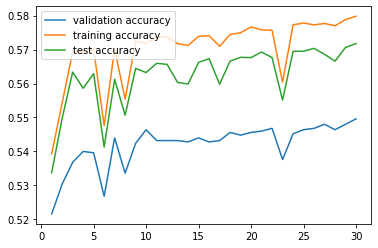

In [11]:
# BOW

import matplotlib.pyplot as plt
%matplotlib inline

EPOCHS = 30
optimizer = torch.optim.SGD(model.parameters(), lr=.1)

optimal_accuracy = 0
optimal_epoch = 0
accuracies = []
train_accuracies = []
test_accuracies = []
for epoch in range(1, EPOCHS + 1):
    #epoch_start_time = time.time()
    train_an_epoch(train_dataloader)
    train_accuracy = get_accuracy(train_dataloader)
    train_accuracies.append(train_accuracy)
    accuracy = get_accuracy(valid_dataloader)
    accuracies.append(accuracy)
    test_accuracy = get_accuracy(test_dataloader)
    test_accuracies.append(test_accuracy)
    #time_taken = time.time() - epoch_start_time
    print()
    print(f'After epoch {epoch} the training accuracy is {train_accuracy:.3f}.')
    print(f'After epoch {epoch} the validation accuracy is {accuracy:.3f}.')
    print(f'After epoch {epoch} the test accuracy is {test_accuracy:.3f}.')
    print()
    if accuracy > optimal_accuracy:
        optimal_accuracy = accuracy
        optimal_epoch = epoch

print(f'The optimal epoch is {optimal_epoch} with validation accuracy is {optimal_accuracy:.3f}.')
        
plt.plot(range(1, EPOCHS+1), accuracies, label = 'validation accuracy')
plt.plot(range(1, EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

In [13]:
from torchtext.vocab import GloVe

glove = GloVe(name='6B')

.vector_cache/glove.6B.zip: 862MB [02:42, 5.30MB/s]                           
100%|█████████▉| 399999/400000 [00:40<00:00, 9979.93it/s] 


In [ ]:
!python -m spacy download en_core_web_sm

In [11]:
!pip install torchdata
!pip install -U torchtext==0.13.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 7.1 MB/s 
     |████████████████████████████████| 139 kB 63.7 MB/s 
     |████████████████████████████████| 127 kB 71.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 7.6 MB/s 
     |████████████████████████████████| 212 kB 48.0 MB/s 
     |████████████████████████████████| 101 kB 14.5 MB/s 
     |████████████████████████████████| 115 kB 70.0 MB/s 
     |████████████████████████████████| 141 kB 60.2 MB/s 
     |████████████████████████████████| 596 kB 61.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [1]:
import en_core_web_sm
import spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 8.0 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
import torch
import torchtext
from torchtext.datasets import IMDB

In [3]:
spacy_en = spacy.load('en_core_web_sm')

In [4]:
def tokenize_en(text):
    """
    Tokenizes English text into a list of tokens
    """
    return [tok.text.lower() for tok in spacy_en.tokenizer(text)]

In [5]:
train_valid_data, test_data = IMDB()

In [6]:
# code from hw 2
from torchtext.vocab.vocab_factory import build_vocab_from_iterator

#from torchtext.data.utils import get_tokenizer
#from torchtext.vocab import Vocab
#tokenizer = get_tokenizer('basic_english')

# build a vocab with vocab class
#from collections import Counter
#from torchtext.vocab import Vocab

# Optionally see the tutorial at 
# https://pytorch.org/tutorials/beginner/translation_transformer.html
            

def yield_eng_tokens(data_iter):
    for pair in data_iter:
        yield tokenize_en(pair[1])
        

# Define special symbols and indices
# Make sure the tokens are in order of their indices to properly 
# insert them in vocab
UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX = 0, 1, 2, 3
special_symbols = ['<unk>', '<pad>', '<bos>', '<eos>']

en_vocab = build_vocab_from_iterator(
    yield_eng_tokens(train_valid_data), min_freq=2,
    specials=special_symbols, special_first=True)

en_vocab.set_default_index(UNK_IDX)

In [7]:
def en_transform(x):
    '''
    Return a list of indices corresponding to tokenized Englist text.
    '''
    return ([en_vocab[token] for token in tokenize_en(x)])

In [16]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

def collate_batch(batch):
    '''
    Collect samples from the data loader into a batch.
    Returns a tensor of shape {max length} x {batch size}
    '''
    en_lst = []
    en_max_len = 0

    for de, en in batch:
        en_lst.append(torch.LongTensor(en_transform(en)))

    en_batch = pad_sequence(en_lst, batch_first=False, 
                            padding_value=PAD_IDX) 
    return en_batch

In [32]:
from torch.utils.data.dataset import random_split

BATCH_SIZE = 1 # batch size
  
train_valid_data, test_data = IMDB()

#train_valid_data = [(0, t[1]) if t[0]=='neg' else (1, t[1]) for t in train_valid_data] # convert 'neg' label to 0 and 'pos' label to 1
#test_data = [(0, t[1]) if t[0]=='neg' else (1, t[1]) for t in test_data] # convert 'neg' label to 0 and 'pos' label to 1

train_valid_data = list(train_valid_data)
num_train = int(len(train_valid_data) * 0.80)
num_valid = len(train_valid_data) - num_train

train_data, valid_data = random_split(
    train_valid_data, [num_train, num_valid])

In [35]:
for idx, batch in enumerate(valid_data):
  print(idx)
  print(batch)

  if idx > -1:
    break

0
('pos', "This film is a wonderful movie based on the life of a man called Grey Owl in 1930s Canada. I found it to be similarly riveting and heartfelt as 'Rudy' and 'Awakenings'. It picks up late in Grey Owl's life and follows him through his most tumultuous and influential period.<br /><br />The film is about a Canadian Indian trapper who finds himself promoting the plight of the over-trapped Beaver. He also predicts the decrease in natural lands and the overuse of Earth's resources. This is an outrageous concept in the 1930s and surprisingly well received. He becomes a well known speaker and the masses are ready to listen.<br /><br />The casting of Pierce Brosnan seems rather odd, but is not outrageous. Anyone wanting to argue that point must first watch the movie to understand. Brosnan provides a wonderful performance as does Annie Galipeau. Galipeau is a strong actress whose place beside Brosnan is refreshingly natural compared to the forced pairings in recent Bond films.<br /><br

In [28]:
# USING collate_batch FUNCTION

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn = collate_batch)
valid_dataloader = DataLoader(valid_data, batch_size=BATCH_SIZE,
                              shuffle=False, collate_fn = collate_batch)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE,
                             shuffle=False, collate_fn = collate_batch)

In [29]:
for idx, batch in enumerate(valid_dataloader):
  print(batch)

  if idx > 1:
    break

tensor([[   15],
        [   25],
        [   11],
        [   53],
        [ 1049],
        [  414],
        [    6],
        [  359],
        [  326],
        [ 3587],
        [   79],
        [   10],
        [13723],
        [   15],
        [  374],
        [   13],
        [  671],
        [   10],
        [   38],
        [   13],
        [  183],
        [   25],
        [    6],
        [   35],
        [  399],
        [   22],
        [    8],
        [ 1287],
        [  567],
        [    9],
        [ 1350],
        [   16],
        [   11],
        [   10],
        [  358],
        [    8],
        [  745],
        [   16],
        [  284],
        [   48],
        [    8],
        [ 6397],
        [   57],
        [    7],
        [ 1375],
        [   13],
        [    4],
        [ 2004],
        [ 7072],
        [   16],
        [   11],
        [    8],
        [ 3255],
        [   41],
        [    8],
        [  720],
        [ 3283],
        [ 1320],
        [    6

In [71]:
# SIMPLE RNN MODEL
from torch import nn

class RNN(nn.Module):
# I referred to this tutorial for help: https://github.com/bentrevett/pytorch-sentiment-analysis/blob/master/1%20-%20Simple%20Sentiment%20Analysis.ipynb
    def __init__(self, vocab_size, emb_dim, hid_dim, output_dim):
        super().__init__()
        # embedding layer
        self.embedding = nn.Embedding(vocab_size, emb_dim)
        # RNN layer
        self.rnn = nn.RNN(emb_dim, hid_dim)
        # linear layer
        self.linear = nn.Linear(hid_dim, output_dim)
    def forward(self, text):
        # get the embeddings
        embedded = self.embedding(text)
        # run through RNN
        output, hidden = self.rnn(embedded)
        return self.linear(hidden.squeeze(0))

In [72]:
INPUT_DIM = len(en_vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 1 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
loss_function = nn.BCEWithLogitsLoss # binary cross entropy

In [73]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
#loss_function = loss_function.to(device)

In [74]:
# calculate accuracy
def get_accuracy(predictions, actual):
  # round to 0 or 1 to get the label prediction
  label_predictions = torch.round(torch.sigmoid(predictions))
  # calculate the number of predictions that match the actual
  num_correct = (label_predictions == actual).float()
  # return accuracy
  return num_correct.sum() / len(num_correct)

In [75]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.1)

def train_an_epoch(dataloader):
  model.train()
  log_interval = 500

  for idx, (label, text) in enumerate(dataloader):
    print('example')
    print(label)
    print(text)
    print(len(text))
    optimizer.zero_grad()
    predictions = model(text)
    predictions = predictions.squeeze(1) # remove the dimension of 1
    loss = loss_function(predictions, label)
    accuracy = get_accuracy(predictions, label)
    loss.backward()
    optimizer.step()
    if idx % log_interval == 0 and idx > 0:
      print(f'At iteration {idx} the loss is {loss:.3f}.')
      print(f'At iteration {idx} the accuracy is {accuracy:.3f}.')

In [76]:
def evaluate(dataloader):
  model.eval()
  total_loss = 0
  total_acc = 0

  with torch.no_grad():
    for label, text in dataloader:
      predictions = model(text)
      predictions = predictions.squeeze(1) # remove the dimension of 1
      loss = loss_function(predictions, label)
      accuracy = get_accuracy(predictions, label)
      total_loss += loss.item()
      total_acc += accuracy.item()
  
  epoch_loss = total_loss / len(dataloader)
  epoch_acc = total_acc / len(dataloader)

  return epoch_loss, epoch_acc 


In [77]:
# code from hw 2
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [78]:
N_EPOCHS = 5

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train_an_epoch(train_dataloader)
    valid_loss, valid_acc = evaluate(valid_dataloader)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut1-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

ValueError: ignored

In [ ]:
test_loss, test_acc = evaluate(test_dataloader)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

In [41]:
import functools

import datasets

import torchtext
import torch
import torch.nn as nn
import torch.optim as optim

In [42]:
train_data, test_data = datasets.load_dataset('imdb', split = ['train', 'test'])

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [43]:
train_data, test_data

(Dataset({
     features: ['text', 'label'],
     num_rows: 25000
 }), Dataset({
     features: ['text', 'label'],
     num_rows: 25000
 }))

In [44]:
spacy_en = spacy.load('en_core_web_sm')


In [45]:
def tokenize_en(text):
    """
    Tokenizes English text into a list of tokens
    """
    return [tok.text.lower() for tok in spacy_en.tokenizer(text)]